## Timeseries of globally-integrated energy flux from barotropic to baroclinic tides

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version : ", xr.__version__)

numpy version  :  1.26.4
pandas version :  2.2.2
xarray version :  2024.5.0


In [2]:
#sns.set_style('white')
#sns.set_context('paper', font_scale=3)
#sns.set_palette('hls', 6)
#sns.set_style('ticks')

In [3]:
dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [4]:
import os, sys
sys.path.append('../../')

In [5]:
from CM4X_metadata import *
exp_dict

{'CM4p25': {'hgrid': '/archive/Raphael.Dussin/datasets/OM4p25/c192_OM4_025_grid_No_mg_drag_v20160808_unpacked/ocean_hgrid.nc',
  'piControl-spinup': 'odiv-210',
  'piControl': 'odiv-230',
  'piControl-continued': 'odiv-306',
  'historical': 'odiv-231',
  'ssp585': 'odiv-232'},
 'CM4p125': {'hgrid': '/archive/Raphael.Dussin/datasets/OM4p125/mosaic_c192_om4p125_bedmachine_v20210310_hydrographyKDunne20210614_unpacked/ocean_hgrid.nc',
  'piControl-spinup': 'odiv-209',
  'piControl': 'odiv-313',
  'piControl-continued': 'odiv-437',
  'historical': 'odiv-255',
  'ssp585': 'odiv-293'}}

In [7]:
cutoff_depth=2500

ds_dict = {}
for model, exps in exp_dict.items():
    ds_dict[model] = {}
    for exp, exp_name in exps.items():
        if exp=='hgrid': continue
        data_path = f"../../data/plotting_ready/TKE_itidal_global_{model}_{exp}.nc"

        print(f"Loading existing processed data file for {model} {exp}.")
        ds = xr.open_dataset(data_path)
            
        ds_dict[model][exp] = ds

Loading existing processed data file for CM4p25 piControl-spinup.
Loading existing processed data file for CM4p25 piControl.
Loading existing processed data file for CM4p25 piControl-continued.
Loading existing processed data file for CM4p25 historical.
Loading existing processed data file for CM4p25 ssp585.
Loading existing processed data file for CM4p125 piControl-spinup.
Loading existing processed data file for CM4p125 piControl.
Loading existing processed data file for CM4p125 piControl-continued.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xarray/coding/times.py:987: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/work/hfd/.conda/envs/CM4X/lib/pyt

Loading existing processed data file for CM4p125 historical.
Loading existing processed data file for CM4p125 ssp585.


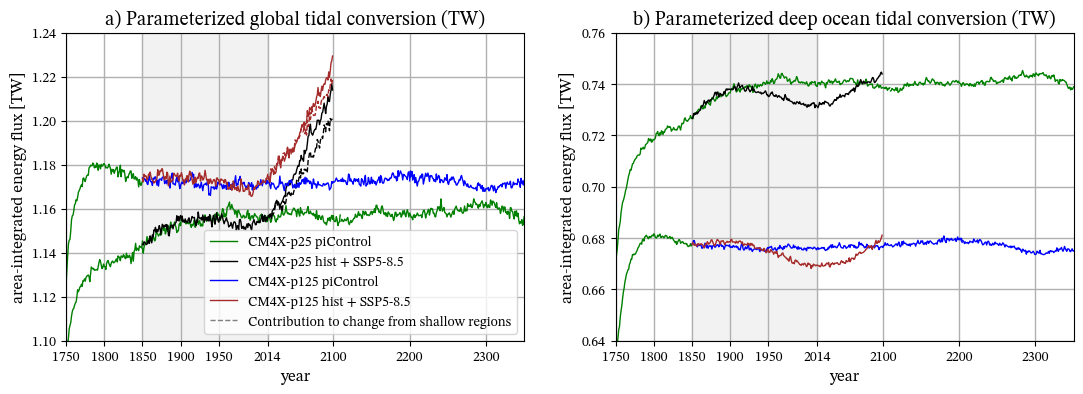

In [10]:
plot_dict = {
    "CM4p25":{
        "piControl-spinup":{"color":"green", "label":None},
        "piControl":{"color":"green", "label":"CM4X-p25 piControl"},
        "piControl-continued":{"color":"green", "label":None},
        "historical":{"color":"black", "label":"CM4X-p25 hist + SSP5-8.5"},
        "ssp585":{"color":"black", "label":None},
    },
    "CM4p125":{
        "piControl-spinup":{"color":"green", "label":None},
        "piControl":{"color":"blue", "label":"CM4X-p125 piControl"},
        "piControl-continued":{"color":"blue", "label":None},
        "historical":{"color":"brown", "label":"CM4X-p125 hist + SSP5-8.5"},
        "ssp585":{"color":"brown", "label":None},
    }
}
lw = 1.

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13,4.0))

ax = axes[0]
for model, exps in ds_dict.items():
    for exp, ds in exps.items():
        
        if "spinup" in exp:
            da = ds.TKE_itidal_global.swap_dims({'time':'year'}).sel(year=slice(1750, 1850))
        else:
            da = ds.TKE_itidal_global
        da.plot.line(ax=ax, x='year', lw=lw, **plot_dict[model][exp])

    shallow_change = (
        exps['ssp585'].swap_dims({'time':'year'}).TKE_itidal_shallow
        - exps['piControl'].swap_dims({'time':'year'}).TKE_itidal_shallow
    )
    shallow_change -= shallow_change.sel(year=2015)
    (
        shallow_change
        + exps['ssp585'].swap_dims({'time':'year'}).TKE_itidal_global.sel(year=2015)
    ).plot(ax=ax, x='year', ls="--", color=plot_dict[model]["ssp585"]['color'], lw=lw)
ax.plot([], [], ls="--", color="grey", lw=1, label="Contribution to change from shallow regions")

ax = axes[1]
for model, exps in ds_dict.items():
    for exp, ds in exps.items():
        
        if "spinup" in exp:
            da = ds.TKE_itidal_deep.swap_dims({'time':'year'}).sel(year=slice(1750, 1850))
        else:
            da = ds.TKE_itidal_deep
        da.plot.line(ax=ax, x='year', lw=lw, color=plot_dict[model][exp]["color"])
    
for ax in axes:
    ax.set_ylabel('area-integrated energy flux [TW]',fontsize=12)
    ax.set_xlabel('year',fontsize=12)
    ax.grid(linewidth=1)
    ax.set_xlim(1750, 2350)
    ax.set_xticks([1750, 1800, 1850, 1900, 1950, 2014, 2100, 2200, 2300])

    yrs = ds_dict['CM4p125']['piControl'].year.values
    ax.fill_between(
        yrs, 0, 2, where=(yrs >= 1850) & (yrs <= 2014),
        interpolate=True, color='gray', alpha=0.1
    )

axes[0].legend(loc='lower right')
axes[0].set_ylim(1.10,1.24)
axes[0].set_title('a) Parameterized global tidal conversion (TW)',fontsize=14);
axes[1].set_ylim(0.64, 0.76)
axes[1].set_title('b) Parameterized deep ocean tidal conversion (TW)',fontsize=14);
fig.savefig('../../figures/tidal_conversion.jpg', bbox_inches='tight', dpi=400, format='jpeg')